In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [2]:
# 1. Load data
data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")["Close"]

/tmp/ipython-input-4158360357.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")["Close"]
[*********************100%***********************]  1 of 1 completed


In [3]:
# 2. Preprocess
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(np.array(data).reshape(-1,1))

# Create dataset (60 past days -> next day)
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # [samples, time_step, features]

In [4]:
# 3. Build model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step,1)),
    LSTM(50),
    Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# 4. Train
model.fit(X, y, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.1340
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0055
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0032
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0024
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0023
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0023
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0021
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0020
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0019
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0018
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0018
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0020
Epoch 13/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0018
Epoch 14/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0020
Epoch 15/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0017
Epoc

In [6]:
# 5. Predictions
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


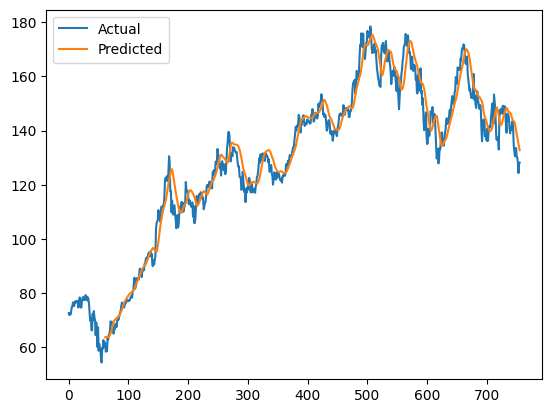

In [7]:
# 6. Plot
plt.plot(data.values, label="Actual")
plt.plot(range(time_step+1, len(train_predict)+time_step+1), train_predict, label="Predicted")
plt.legend()
plt.show()